In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import pyFAI, pyFAI.detectors,pyFAI.azimuthalIntegrator
import glob
import h5py

def visit_func(name, node):
    '''
    Return all groups and datasets name and shapes of h5 file called name
    '''
    if isinstance(node, h5py.Group):
        print(node.name)
    elif isinstance(node, h5py.Dataset):
        if (node.dtype == 'object') :
            print (node.name, 'is an object Dataset')
        else:
            print('\t', node.name, node.shape)
    else:
        print(node.name, 'is an unknown type')

In [3]:
# -- parameters
run = 222753

det=pyFAI.detectors.RayonixMx225hs()

#define an integrator
sample_det_distance=0.095
wavelength=0.887e-10
posx=det.pixel1*970
posy=det.pixel2*930
ai = pyFAI.azimuthalIntegrator.AzimuthalIntegrator(dist=sample_det_distance, detector=det, wavelength=wavelength,poni1=posx,poni2=posy)


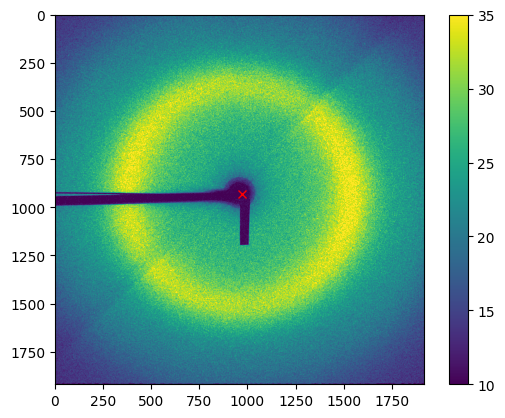

In [4]:
# mask

run=222753
shot=100
data=mpimg.imread(f"/xustrg0/2024B8049/{run}/data_{shot:06}.img")

mask=data[:,:]==0 # testing with an empty mask
#np.save('/UserData/fperakis/test_data_2025/utilities/empty_mask.npy',mask)

plt.figure()
plt.imshow(data,vmin=10,vmax=35)
plt.plot(posx/det.pixel1,posy/det.pixel2,'x',color='red')
circ=plt.Circle(xy=(posx/det.pixel1,posy/det.pixel2), radius=700, lw=1, fc='none', ls='dashed' ,color='r')
plt.colorbar()
#ax.add_patch(circ)

In [16]:
directory = f"/xustrg0/2024B8049/{run}/"  

N_shots = 100 #len(glob.glob1(directory,"*.img"))
I=np.zeros([N_shots,300])
for shot in range(N_shots):
    start_=time.time()
    data=mpimg.imread(f"/xustrg0/2024B8049/{run}/data_{shot+1:06}.img").astype('int16')
    q,I[shot,:]=np.array(ai.integrate1d(data.astype('int16'),300,mask=mask,correctSolidAngle=False,unit='q_nm^-1'))
    end_=time.time()    
    print(r'shot %i | %.2f Hz'%(shot, 1/(end_-start_)))


shot 0 | 6.48 Hz
shot 1 | 9.44 Hz
shot 2 | 10.88 Hz
shot 3 | 10.90 Hz
shot 4 | 10.88 Hz
shot 5 | 10.89 Hz
shot 6 | 10.81 Hz
shot 7 | 10.88 Hz
shot 8 | 10.67 Hz
shot 9 | 10.75 Hz
shot 10 | 10.99 Hz
shot 11 | 10.89 Hz
shot 12 | 10.90 Hz
shot 13 | 10.93 Hz
shot 14 | 10.93 Hz
shot 15 | 10.88 Hz
shot 16 | 10.94 Hz
shot 17 | 10.99 Hz
shot 18 | 10.91 Hz
shot 19 | 10.92 Hz
shot 20 | 10.83 Hz
shot 21 | 10.96 Hz
shot 22 | 10.87 Hz
shot 23 | 10.98 Hz
shot 24 | 10.91 Hz
shot 25 | 10.99 Hz
shot 26 | 10.92 Hz
shot 27 | 10.82 Hz
shot 28 | 10.88 Hz
shot 29 | 10.94 Hz
shot 30 | 10.56 Hz
shot 31 | 10.88 Hz
shot 32 | 10.96 Hz
shot 33 | 10.87 Hz
shot 34 | 10.93 Hz
shot 35 | 10.89 Hz
shot 36 | 10.87 Hz
shot 37 | 10.97 Hz
shot 38 | 10.96 Hz
shot 39 | 10.68 Hz
shot 40 | 10.77 Hz
shot 41 | 10.64 Hz
shot 42 | 10.80 Hz
shot 43 | 10.93 Hz
shot 44 | 10.79 Hz
shot 45 | 10.85 Hz
shot 46 | 10.79 Hz
shot 47 | 10.75 Hz
shot 48 | 10.83 Hz
shot 49 | 10.92 Hz
shot 50 | 10.82 Hz
shot 51 | 10.87 Hz
shot 52 | 10.60 Hz
shot 

Text(0, 0.5, '$I(q)$')

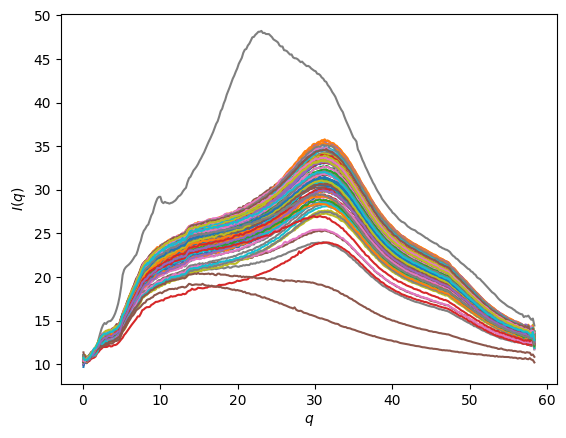

In [17]:
plt.figure()
for shot in range(N_shots):
    plt.plot(q,I[shot,:])
plt.xlabel('$q$')
plt.ylabel('$I(q)$')


In [20]:
hf = h5py.File('data.h5', 'w')
hf.create_dataset('q', data=q)
hf.create_dataset('I', data=I)
hf.close()

In [21]:
data=h5py.File('data.h5', 'r')

In [7]:

def Iq_calculator(run):
    """
    Calculate the Iq and Iphi of an entire run and generates an h5 file with the Iqs for each shot
    args:
        run : run number without extensions
    """

    det=pyFAI.detectors.RayonixMx225hs()

    #define an integrator
    sample_det_distance=0.095
    wavelength=0.887e-10
    posx=det.pixel1*970
    posy=det.pixel2*930
    ai = pyFAI.azimuthalIntegrator.AzimuthalIntegrator(dist = sample_det_distance, detector = det, wavelength = wavelength, poni1 = posx, poni2 = posy)

    # integration params
    nbins = 100#300
    n_phi = 36
    directory = f"/xustrg0/2024B8049/{run}/"  
    N_shots = len(glob.glob1(directory,"*.img"))
    I=np.zeros([N_shots, n_phi,nbins])
    
    for shot in range(10):
        start_=time.time()
        I[shot,:,:], q, phi = ai.integrate2d_ng(mpimg.imread(f"/xustrg0/2024B8049/{run}/data_{shot+1:06}.img").astype('int16'), nbins, n_phi, mask=mask, correctSolidAngle=True, unit='q_nm^-1')
        end_=time.time()
        print(r'shot %i | %.2f Hz'%(shot, 1/(end_-start_)))
                               
    print("End of Iq and Iphi calculation " )

In [8]:
Iq_calculator(run)

shot 0 | 0.55 Hz
shot 1 | 8.11 Hz
shot 2 | 8.17 Hz
shot 3 | 8.15 Hz
shot 4 | 8.07 Hz
shot 5 | 8.03 Hz
shot 6 | 8.07 Hz
shot 7 | 8.10 Hz
shot 8 | 8.16 Hz
shot 9 | 8.13 Hz
End of Iq and Iphi calculation 
